In [33]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
def connect_to_database():
    return mysql.connector.connect(
        host='bnlrjjogqqtrux5dkhx3-mysql.services.clever-cloud.com',
        port=3306,
        user='ug9k8pdx4fu2lc9p',
        password='MiyaArHakCa5tGKIRcec',
        database='bnlrjjogqqtrux5dkhx3'
    )



In [35]:
def run_query(query):
    db = connect_to_database()  # Conecta a la base de datos
    cursor = db.cursor()        # Crea un cursor para ejecutar comandos SQL
    cursor.execute(query)       # Ejecuta la consulta SQL proporcionada
    
    # Recupera todos los resultados de la consulta
    result = cursor.fetchall()
    
    # Recupera los nombres de las columnas
    columns = [desc[0] for desc in cursor.description]
    
    cursor.close()              # Cierra el cursor
    db.close()                  # Cierra la conexión a la base de datos
    
    # Convierte los resultados en un DataFrame de Pandas
    return pd.DataFrame(result, columns=columns)

In [36]:
query1 = """
SELECT * FROM VistaPartidos;
"""
df1 = run_query(query1)
df1


,fecha_partido,estadisticas,id_torneo,goles_equipo_visitante,goles_local,nombre_equipo_local,nombre_equipo_visitante,ganador,fecha_registroBD
0,2023-11-16,None,3,1.0,2.0,Colombia,Brasil,Holi que más,None
1,2023-09-07,None,3,0.0,1.0,Colombia,Venezuela\r\n,olas,None
2,2023-10-12,None,3,2.0,2.0,Colombia,Uruguay\r\n,None,None
3,2023-11-16,None,3,1.0,2.0,Colombia,Brasil,None,None
4,2024-09-10,None,3,NaN,NaN,Colombia,Argentina,None,None
...,...,...,...,...,...,...,...,...,...
7529,2024-05-04,None,24,2.0,2.0,Monza\r\n,Lazio,None,2024-07-23
7530,2024-05-19,None,24,1.0,0.0,Monza\r\n,Frosinone,None,2024-07-23
7531,2024-08-19,None,25,NaN,NaN,Real Valladolid,Espanyol,None,2024-08-01
7532,2024-08-17,None,26,NaN,NaN,Ipswich Town\r\n,Liverpool,None,2024-08-01


In [37]:
query2 = """
SELECT 
    equipo, 
    SUM(victorias) AS partidos_ganados, 
    SUM(empates) AS partidos_empatados, 
    SUM(derrotas) AS partidos_perdidos 
FROM 
    ( 
        SELECT 
            nombre_equipo_local AS equipo, 
            (goles_local > goles_equipo_visitante) AS victorias,
            (goles_local = goles_equipo_visitante) AS empates, 
            (goles_local < goles_equipo_visitante) AS derrotas 
        FROM 
            VistaPartidos 
        WHERE 
            id_torneo = 8 or id_torneo=9 or id_torneo=10 or id_torneo=11 or id_torneo=12 or id_torneo=13
        
        UNION ALL 
        
        SELECT 
            nombre_equipo_visitante AS equipo, 
            (goles_equipo_visitante > goles_local) AS victorias, 
            (goles_equipo_visitante = goles_local) AS empates, 
            (goles_equipo_visitante < goles_local) AS derrotas 
        FROM 
            VistaPartidos 
        WHERE 
            id_torneo = 8 or id_torneo=9 or id_torneo=10 or id_torneo=11 or id_torneo=12 or id_torneo=13
            
    ) AS subconsulta  
GROUP BY 
    equipo 
ORDER BY 
    partidos_ganados DESC;
"""

In [38]:
df2 = run_query(query2)
df2

,equipo,partidos_ganados,partidos_empatados,partidos_perdidos
0,Bayern,141,32,31
1,B. Dortmund,127,34,44
2,RB Leipzig,112,50,42
3,Leverkusen,112,40,52
4,Wolfsburgo,81,49,74
5,B. MGladbach,78,55,71
6,Eintracht Fr.,77,66,61
7,Friburgo,75,58,70
8,Hoffenheim,75,50,80
9,Unión Berlín\r\n,68,40,61


) missing from font(s) DejaVu Sans.pykernel_4000\850756753.py:22: UserWarning: Glyph 13 (
  plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


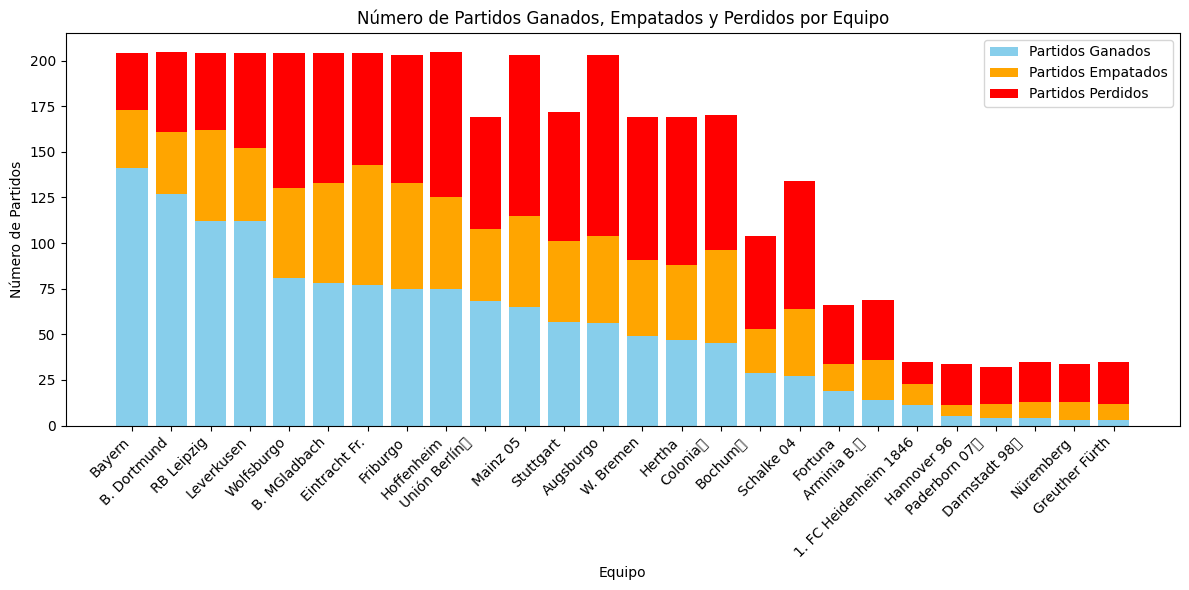

In [39]:
import matplotlib.pyplot as plt

# Supongamos que df2 es el DataFrame que has obtenido
# df2 = run_query(query2)

# Crear el diagrama de barras
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario

# Configura las barras
plt.bar(df2['equipo'], df2['partidos_ganados'], color='skyblue', label='Partidos Ganados')
plt.bar(df2['equipo'], df2['partidos_empatados'], color='orange', bottom=df2['partidos_ganados'], label='Partidos Empatados')
plt.bar(df2['equipo'], df2['partidos_perdidos'], color='red', bottom=df2['partidos_ganados'] + df2['partidos_empatados'], label='Partidos Perdidos')

# Configura los ejes y el título
plt.xlabel('Equipo')
plt.ylabel('Número de Partidos')
plt.title('Número de Partidos Ganados, Empatados y Perdidos por Equipo')
plt.xticks(rotation=45, ha='right')  # Rote los nombres de los equipos si es necesario
plt.legend()

# Muestra el gráfico
plt.tight_layout()  # Ajusta el diseño para que no se corten las etiquetas
plt.show()

In [43]:
queryELO = """
SELECT * FROM vista_elo;
"""
dfELO= run_query(queryELO)
dfELO

,id,id_partido,id_local,id_visitante,elo_local_antes,elo_local_despues,elo_visitante_antes,elo_visitante_despues,Equipo_local,Equipo_visitante
0,299,35517,2,15,None,1934.0,None,1762.0,Medellín,Once Caldas
1,322,35540,2,3,None,1926.0,None,1867.0,Medellín,América
2,341,35559,2,13,None,1919.0,None,1879.0,Medellín,Bucaramanga
3,359,35577,2,5,None,1932.0,None,1858.0,Medellín,Nacional
4,288,35506,3,9,None,1846.0,None,1795.0,América,Alianza Petrolera
...,...,...,...,...,...,...,...,...,...,...
483,422,35640,177,149,None,2244.0,None,2421.0,Monza\r\n,Lazio
484,445,35663,177,165,None,2253.0,None,2057.0,Monza\r\n,Frosinone
485,469,35687,178,179,None,NaN,None,NaN,Real Valladolid,Espanyol
486,471,35689,181,73,None,NaN,None,NaN,Ipswich Town\r\n,Liverpool


In [49]:
# Consulta SQL
queryEvolucionElo = """
SELECT 
    v.Equipo,
    v.id_equipo,
    v.elo_despues,
    v.id_partido,
    Partidos.id_torneo,
    v.elo_oponente
FROM 
    (
        SELECT 
            Equipo_local AS Equipo,
            id_local AS id_equipo,
            elo_local_despues AS elo_despues,
            id_partido,
            elo_visitante_despues AS elo_oponente
        FROM 
            vista_elo 
        WHERE 
            id_local IN (107,102)

        UNION ALL

        SELECT 
            Equipo_visitante AS Equipo,
            id_visitante AS id_equipo,
            elo_visitante_despues AS elo_despues,
            id_partido,
            elo_local_despues AS elo_oponente
        FROM 
            vista_elo 
        WHERE 
            id_visitante IN (107,102)
    ) v
INNER JOIN 
    Partidos
ON 
    Partidos.id_partido = v.id_partido
WHERE 
    Partidos.id_torneo IN (8,9,10,11,12,13)
ORDER BY 
    v.id_partido ASC;
"""

# Ejecutar consulta y mostrar resultados
dfEvolucionElo = run_query(queryEvolucionElo)
print(dfEvolucionElo)

              Equipo  id_equipo  elo_despues  id_partido  id_torneo  \
0   Unión Berlín\r\n        107         2267       35441         13   
1           Mainz 05        102         2281       35442         13   
2   Unión Berlín\r\n        107         2261       35447         13   
3           Mainz 05        102         2283       35448         13   
4   Unión Berlín\r\n        107         2251       35461         13   
5           Mainz 05        102         2292       35464         13   
6   Unión Berlín\r\n        107         2245       35471         13   
7           Mainz 05        102         2303       35472         13   
8   Unión Berlín\r\n        107         2255       35480         13   
9           Mainz 05        102         2312       35482         13   
10  Unión Berlín\r\n        107         2243       35484         13   
11          Mainz 05        102         2315       35488         13   
12  Unión Berlín\r\n        107         2234       35493         13   
13    

) missing from font(s) DejaVu Sans.lwebscrapp\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


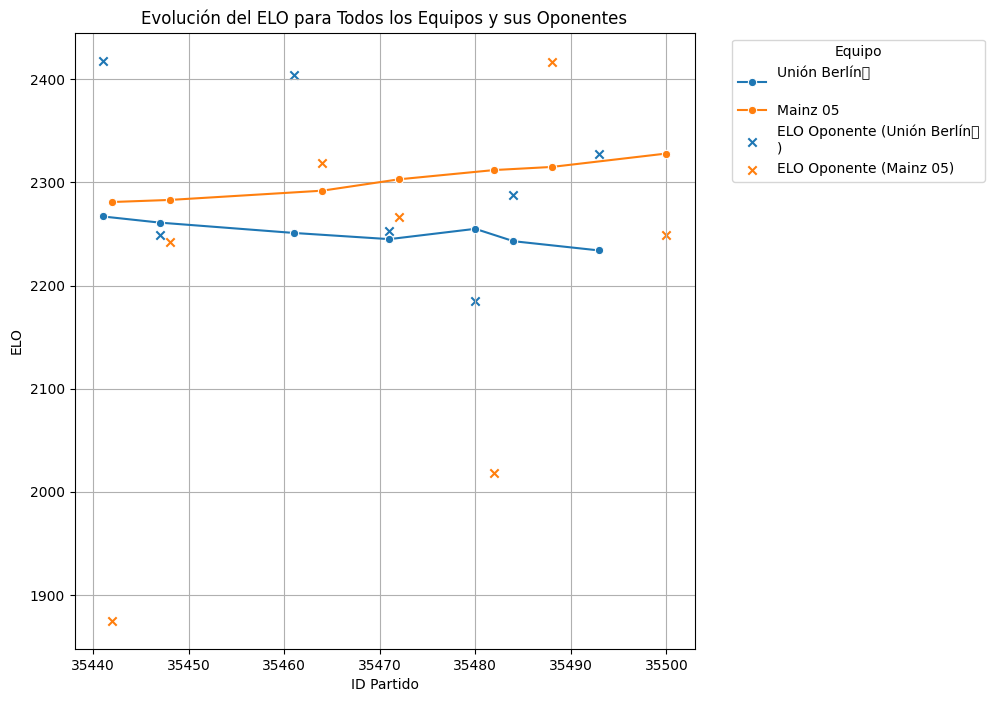

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(8, 8))

# Graficar ELO después del partido para los equipos
palette = sns.color_palette('tab10', n_colors=len(dfEvolucionElo['Equipo'].unique()))
team_colors = dict(zip(dfEvolucionElo['Equipo'].unique(), palette))

# Graficar ELO después del partido para los equipos
sns.lineplot(data=dfEvolucionElo, x='id_partido', y='elo_despues', hue='Equipo', marker='o', palette=team_colors, linestyle='-')

# Graficar ELO del oponente para los equipos
for equipo in dfEvolucionElo['Equipo'].unique():
    subset = dfEvolucionElo[dfEvolucionElo['Equipo'] == equipo]
    plt.scatter(subset['id_partido'], subset['elo_oponente'], marker='x', color=team_colors[equipo], label=f'ELO Oponente ({equipo})')

# Configurar etiquetas y leyenda
plt.xlabel('ID Partido')
plt.ylabel('ELO')
plt.title('Evolución del ELO para Todos los Equipos y sus Oponentes')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Mostrar gráfico
plt.show()
